In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:

df = pd.read_csv("ecommerce_sales.csv")

df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male


In [4]:
df.shape

(34500, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

In [6]:
df.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,1.490725,4.814203,170.008494,6.152120,28.116505,43.474377
std,195.620477,0.069894,0.932270,1.242141,357.503014,2.389539,53.352947,14.980682
min,1.010000,0.000000,1.000000,3.000000,0.820000,0.000000,-6.200000,18.000000
25%,16.690000,0.000000,1.000000,4.000000,19.710000,4.420000,1.500000,31.000000
50%,45.660000,0.000000,1.000000,5.000000,56.820000,6.090000,10.550000,43.000000
75%,130.950000,0.100000,2.000000,6.000000,168.530000,7.830000,33.132500,56.000000
max,2930.470000,0.300000,5.000000,13.000000,12931.800000,15.650000,1536.170000,69.000000


In [7]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'category', 'price',
       'discount', 'quantity', 'payment_method', 'order_date',
       'delivery_time_days', 'region', 'returned', 'total_amount',
       'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender'],
      dtype='object')

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [9]:
df.isnull().sum()

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64

In [10]:
print(df['category'].unique())
print(df['payment_method'].unique())
print(df['region'].unique())
print(df['customer_gender'].unique())

['Home' 'Grocery' 'Electronics' 'Beauty' 'Fashion' 'Toys' 'Sports']
['Credit Card' 'UPI' 'COD' 'PayPal' 'Debit Card' 'Wallet']
['West' 'South' 'North' 'East' 'Central']
['Female' 'Male' 'Other']


In [11]:
df[['price', 'discount', 'total_amount', 'quantity']].describe()

,price,discount,total_amount,quantity
count,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,170.008494,1.490725
std,195.620477,0.069894,357.503014,0.932270
min,1.010000,0.000000,0.820000,1.000000
25%,16.690000,0.000000,19.710000,1.000000
50%,45.660000,0.000000,56.820000,1.000000
75%,130.950000,0.100000,168.530000,2.000000
max,2930.470000,0.300000,12931.800000,5.000000


In [12]:
df['order_date'].min(), df['order_date'].max()

(Timestamp('2023-09-12 00:00:00'), Timestamp('2025-09-11 00:00:00'))

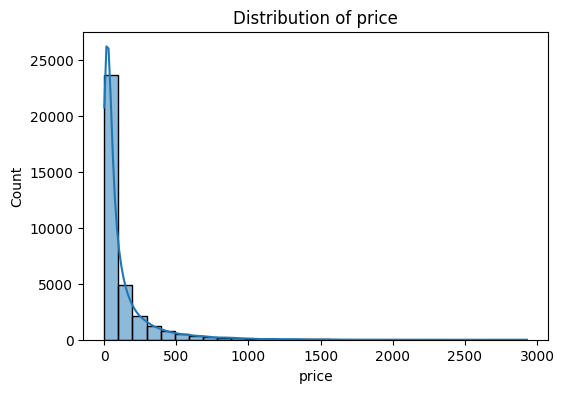

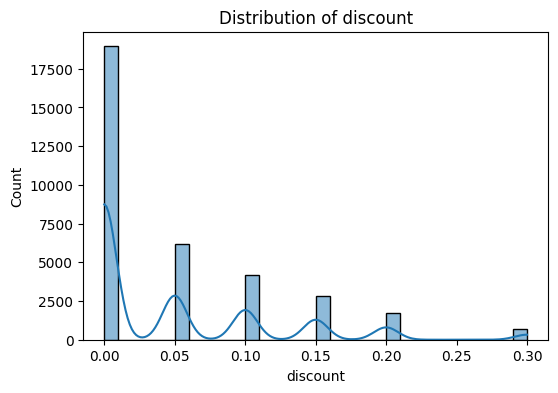

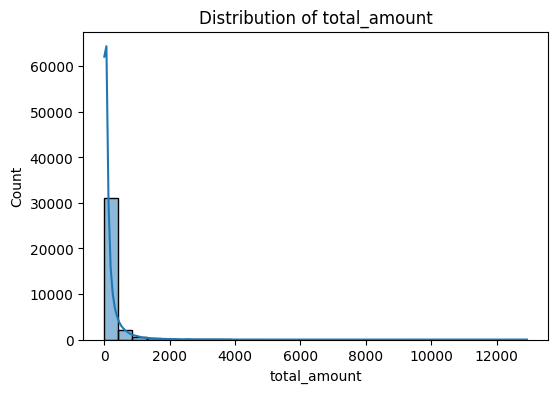

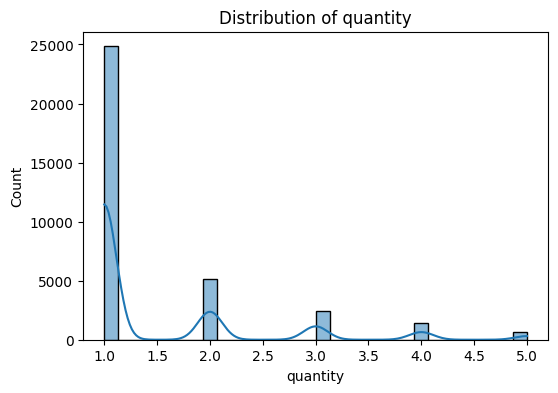

In [13]:
num_cols = ['price', 'discount', 'total_amount', 'quantity']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
df['customer_id'].nunique()


7903

In [15]:
df.groupby('category')['customer_id'].nunique()


category
Beauty         3192
Electronics    4257
Fashion        4358
Grocery        3174
Home           3987
Sports         3290
Toys           3286
Name: customer_id, dtype: int64

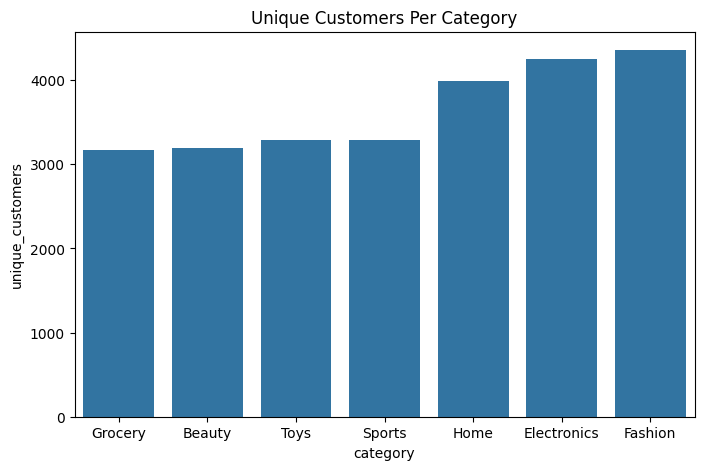

In [16]:
unique_customers = df.groupby('category')['customer_id'].nunique().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=unique_customers.index, y=unique_customers.values)
plt.ylabel("unique_customers")
plt.xlabel("category")
plt.title("Unique Customers Per Category")
plt.show()